In [57]:
import utils.dataset as dataset
import utils.helpers as helpers
import implementations

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
helpers.test()

In [ ]:
TRAIN_DATASET = 'data/train.csv'
TEST_DATA = 'data/test.csv'

In [ ]:
def add_bias_column(X):
    X_temp = np.ones((X.shape[0], X.shape[1]+1))
    X_temp[:,:-1] = X
    X = X_temp
    return X

def least_squares_GD(Y_train, X_train, w_initial, max_iters, gamma_MSEGD=0.00000074):
    print("Mean Squared Error Gradient Descent")
    # best setting:max_iters 5000  Gradient Descent(14999/14999): gamma=7.4e-07 mse-loss=0.35792074222770376
    #gamma_MSEGD = 0.00000074
    # w is the last optimized vector of the algorithm (len(w)==30)
    gradient_losses, w = helpers.least_squares_GD(Y_train, X_train, w_initial, max_iters, gamma_MSEGD)
    return gradient_losses, w

def least_squares_SGD(Y_train, X_train, w_initial, max_iters, batch_size=100000000, gamma_MSEGD=0.00000074):
    print("Stochastic Mean Squared Error Gradient Descent")
    # best setting even with batch size = every row .. SGD(4999/4999): loss=0.36089722718771117 super costly
    #gamma_SMSEGD = 0.00000074
    #batch_size = 100000000
    sgd_losses, w = helpers.least_squares_SGD(Y_train, X_train, w_initial, batch_size, max_iters, gamma_MSEGD)
    return sgd_losses, w

def least_squares(Y_train, X_train):
    answer = helpers.least_squares(Y_train, X_train)
    return answer

def ridge_regression(Y_train, X_train, lamda):
    print("Ridge regression")
    w = helpers.ridge_regression(Y_train, X_train, lamda)
    loss_train = helpers.compute_loss(Y_train, X_train, w)
    return loss_train, w

def logistic_regression(Y_train, X_train, w_initial, max_iters, gamma):
    print("todo")
    
def reg_logistic_regression(Y_train, X_train, lamda, w_initial, max_iters, gamma):
    print("todo")
    

In [ ]:
print("Loading data ..")

# load the train data
Y_train, X_train, indexes = dataset.load_csv_data(TRAIN_DATASET)

# {-1, 1} -> {0l, 1}
Y_train[np.where(Y_train==-1)] = 0.0

print("Load done ..")

In [ ]:
print("Preprocessing train data ..")

ratio_for_splitting = 0.8

# chosen experimenttally
features_to_delete = [14, 17, 18]

# pre process train data
X_train = dataset.delete_features(X_train, features_to_delete)
X_train = dataset.preprocess_dataset(X_train)

# Add bias
X_train = add_bias_column(X_train)

# split_data
Y_train, Y_validation, X_train, X_validation = dataset.split_data(Y_train, X_train, ratio_for_splitting)
helpers.set_valid(X_validation, Y_validation)

print("Preprocess done ..")

In [ ]:
print("Preprocessing test data ..")

# load test data for predicting Y_data
Y_test, X_test, indexes = dataset.load_csv_data(TEST_DATA)
Y_test[np.where(Y_test==-1)] = 0.0

# pre process test data
X_test = dataset.delete_features(X_test, features_to_delete)
X_test = dataset.preprocess_dataset(X_test)

X_test = add_bias_column(X_test)

print("Preprocess done ..")

In [ ]:
### delete

In [124]:
# put function to helpers
def plot_train_test(train_errors, test_errors, lambdas, degree):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(lambdas, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    #plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    #plt.savefig("ridge_regression")

In [55]:
# defines initial w of size of features
_features = X_train.shape[1]
w_initial = np.zeros((_features), dtype=int)

## Linear regression using gradient descent

## Linear regression using stochastic gradient descent

In [ ]:
### TODO

## Least squares regression using normal equations

In [ ]:
### TODO

## Ridge regression using normal equations

#### Fining hyperparameter lambda

1 proportion=0.8, degree=0, lambda=0.010, Training RMSE=0.07343, Testing RMSE=0.07277
2 proportion=0.8, degree=0, lambda=0.017, Training RMSE=0.07345, Testing RMSE=0.07283
3 proportion=0.8, degree=0, lambda=0.028, Training RMSE=0.07347, Testing RMSE=0.07295
4 proportion=0.8, degree=0, lambda=0.046, Training RMSE=0.07352, Testing RMSE=0.07314
5 proportion=0.8, degree=0, lambda=0.077, Training RMSE=0.07360, Testing RMSE=0.07340
6 proportion=0.8, degree=0, lambda=0.129, Training RMSE=0.07374, Testing RMSE=0.07373
7 proportion=0.8, degree=0, lambda=0.215, Training RMSE=0.07396, Testing RMSE=0.07407
8 proportion=0.8, degree=0, lambda=0.359, Training RMSE=0.07427, Testing RMSE=0.07438
9 proportion=0.8, degree=0, lambda=0.599, Training RMSE=0.07463, Testing RMSE=0.07464
10 proportion=0.8, degree=0, lambda=1.000, Training RMSE=0.07498, Testing RMSE=0.07486


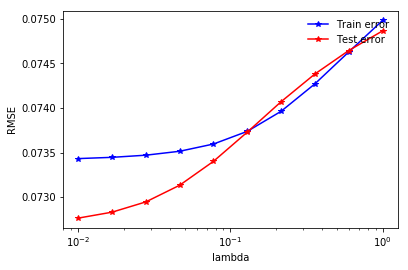

In [125]:
def ridge_regression_lambda_testing(y, x, ratio, seed, lambdarange):
    # define parameter
    lambdas = lambdarange
    
    # split data into test and train
    x_tr, x_te, y_tr, y_te = dataset.split_data(x, y, ratio, seed)
    c = 0
    # ridge regression with different lambda
    err_train = []
    err_test = []
    for ind, lambda_ in enumerate(lambdas):
        training_tr = implementations.Training('ridge_regression', {
            'lambda_': lambda_
        })
        w_tr, mse_tr = training_tr.fit(x_tr, y_tr)
        
        training_te = implementations.Training('ridge_regression', {
            'lambda_': lambda_
        })
        w_te, mse_te = training_te.fit(x_te, y_te)
                
        err_train.append(mse_tr)
        err_test.append(mse_te)
        c += 1
        print(c, "proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.5f}, Testing RMSE={te:.5f}".format(
               p=ratio, d=degree, l=lambda_, tr=err_train[ind], te=err_test[ind]))
    plot_train_test(err_train, err_test, lambdas, degree)

# seed for splitting
seed = 1234

# seed for splitting
split_ratio = ratio_for_splitting

# range of lambda to plot (from, to, iterations)
lambdarange = np.logspace(-2, 0, 10)

ridge_regression_lambda_testing(Y_train, X_train, split_ratio, seed, lambdarange)

## Logistic regression using gradient descent or SGD

In [ ]:
### TODO

## Regularized logistic regression using gradient descent or SGD

In [ ]:
### TODO